# Work on log of timepending variable, using two weeks of data
(08/25/23-09/07/23), code reference: 11/20/23
### Separately created master_finalized_txns_limited.csv 
### from master_finalized_txns.csv.gz (which Tara created)
(status in (confirmed, failed))
### Remove rows where timepending is missing, or timepending = 0
### Find best distribution for timepending
NEW 11/16/23: going through the distributions 10 at a time.
### Kept from earlier: Generate summary statistics, histogram for timepending


In [1]:
#install fitter package
#pip install fitter

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import seaborn as sns
import datetime
import scipy

#package for analysis of distribution fit
from fitter import Fitter, get_common_distributions, get_distributions

import gzip

In [2]:
from pathlib import Path

###data_folder = ADD DATA FOLDER LOCATION ####

#read in TWO WEEK, trimmed and finalized, LIMITED mempool data set

limited_df = data_folder/'master_finalized_txns_limited.csv'
df = pd.read_csv(limited_df)


df = df.loc[: , ['basefeepergas', 'maxpriorityfeepergas', 'maxfeepergas', 'timepending', 'blockspending']]
df.shape



(10505807, 5)

## Remove rows where timepending is missing, or where timepending = 0 
### (only zero for private transactions that would not show up in mempool)

In [3]:
#Remove rows where timepending is 0, or is Nan
df2 = df.dropna( how = 'all', subset=['timepending'])
df2.shape

df3 = df2[df2.timepending != 0].copy()

#convert to seconds (timepending is in milliseconds)
df3['timepending_'] = df3['timepending']/1000

df3.shape

(10176150, 6)

In [4]:
del df
del df2
del limited_df

## New variable: log of timepending

In [5]:
##data['natural_log'] = np.log(data['Salary'])
df3['logtimepending'] = np.log(df3['timepending'])

In [8]:
df3.head()

,basefeepergas,maxpriorityfeepergas,maxfeepergas,timepending,blockspending,timepending_,logtimepending
0,1.360266e+10,2.000000e+09,2.400000e+10,7565.0,1.0,7.565,8.931288
1,1.360266e+10,1.500000e+09,2.885092e+10,3625.0,1.0,3.625,8.195610
2,1.360266e+10,2.000000e+09,2.400000e+10,9400.0,1.0,9.400,9.148465
3,1.360266e+10,2.000000e+09,2.400000e+10,9440.0,1.0,9.440,9.152711
4,1.360266e+10,2.000000e+09,2.400000e+10,7544.0,1.0,7.544,8.928508


In [ ]:
df3.info()

In [6]:
df3.timepending.describe()

count    1.017615e+07
mean     3.484537e+05
std      5.428736e+07
min      1.000000e+00
25%      5.176000e+03
50%      8.460000e+03
75%      1.133600e+04
max      1.554235e+10
Name: timepending, dtype: float64

In [6]:
#find 99th percentile for timepending
#(NOTE: percentile function was not working before with timepending: rows with missing timepending had not been removed)
#np.nanpercentile(df3['timepending'], 99)

x = np.percentile(df3['timepending'], 99)
x

252917.54999999888

# Starting here: following steps described on medium.com

https://medium.com/the-researchers-guide/finding-the-best-distribution-that-fits-your-data-using-pythons-fitter-library-319a5a0972e9

## **Plot histogram (logtimepending)

C:\Users\Marlie\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


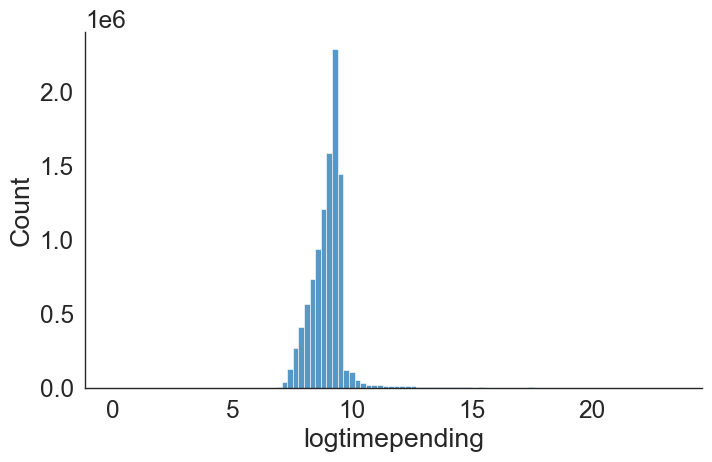

In [19]:
#Plot histogram
sns.set_style('white')
sns.set_context("paper", font_scale = 2)
#sns.displot(data=df3, x="timepending", kind="hist", bins = 100, aspect = 1.5)
sns.displot(data=df3[df3['logtimepending']<26], x="logtimepending", kind="hist", bins = 100, aspect = 1.5)

## **Data preparation (timepending and logtimepending)

In [7]:
#convert to a numpy array
##height = dataset["Height"].values

timepending = df3["timepending"].values
logtimepending = df3["logtimepending"].values


## **Fitting distributions  (logtimepending)

Use trick from here: https://fitter.readthedocs.io/en/latest/references.html
limit to 10 distributions at a time
These are the distributions that actually run below: expon

SKIPPED _fit distribution (taking more than 30 seconds)
SKIPPED burr distribution (taking more than 30 seconds)
SKIPPED beta distribution (taking more than 30 seconds)
SKIPPED alpha distribution (taking more than 30 seconds)
SKIPPED betaprime distribution (taking more than 30 seconds)
SKIPPED argus distribution (taking more than 30 seconds)
SKIPPED bradford distribution (taking more than 30 seconds)
SKIPPED arcsine distribution (taking more than 30 seconds)
SKIPPED anglit distribution (taking more than 30 seconds)
SKIPPED burr12 distribution (taking more than 30 seconds)
_fit was not fitted. no parameters available
burr was not fitted. no parameters available
beta was not fitted. no parameters available
alpha was not fitted. no parameters available
betaprime was not fitted. no parameters available
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


,sumsquare_error,aic,bic,kl_div,ks_statistic,ks_pvalue
_fit,inf,inf,inf,inf,NaN,NaN
burr,inf,inf,inf,inf,NaN,NaN
beta,inf,inf,inf,inf,NaN,NaN
alpha,inf,inf,inf,inf,NaN,NaN
betaprime,inf,inf,inf,inf,NaN,NaN


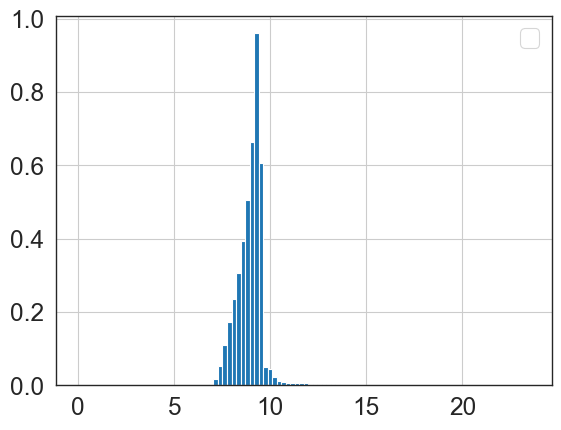

In [17]:
### >>> f = fitter.Fitter(data)

### >>> # just a trick to use only 10 distributions instead of 80 to speed up the fitting
### >>> f.distributions = f.distributions[0:10] + ['gamma']


## First 9 distributions, plus gamma
f = Fitter(logtimepending)
f.distributions = f.distributions[0:10]
f.fit()
#Generate the fitted distribution summary using .summary( ) method
f.summary()

SKIPPED chi distribution (taking more than 30 seconds)
SKIPPED cauchy distribution (taking more than 30 seconds)
SKIPPED crystalball distribution (taking more than 30 seconds)
SKIPPED cosine distribution (taking more than 30 seconds)
SKIPPED dgamma distribution (taking more than 30 seconds)
SKIPPED erlang distribution (taking more than 30 seconds)
SKIPPED dweibull distribution (taking more than 30 seconds)
SKIPPED chi2 distribution (taking more than 30 seconds)
SKIPPED exponnorm distribution (taking more than 30 seconds)
chi was not fitted. no parameters available
cauchy was not fitted. no parameters available
crystalball was not fitted. no parameters available
cosine was not fitted. no parameters available


,sumsquare_error,aic,bic,kl_div,ks_statistic,ks_pvalue
expon,2.230627,704.35592,732.627035,inf,0.551268,0.0
chi,inf,inf,inf,inf,NaN,NaN
cauchy,inf,inf,inf,inf,NaN,NaN
crystalball,inf,inf,inf,inf,NaN,NaN
cosine,inf,inf,inf,inf,NaN,NaN


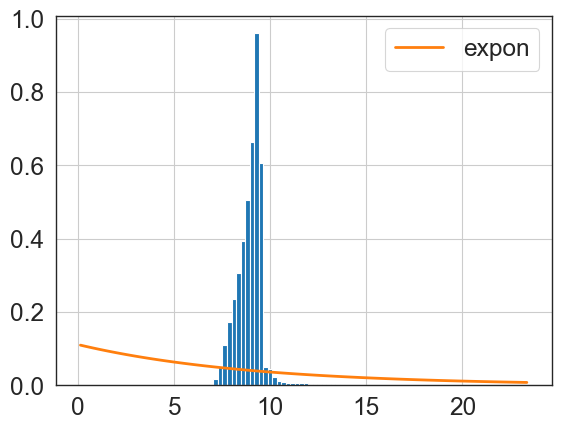

In [18]:
### >>> f = fitter.Fitter(data)

### >>> # just a trick to use only 10 distributions instead of 80 to speed up the fitting
### >>> f.distributions = f.distributions[0:10] + ['gamma']


## Next 10 distributions
f = Fitter(logtimepending)
f.distributions = f.distributions[10:20]
f.fit()
#Generate the fitted distribution summary using .summary( ) method
f.summary()

SKIPPED foldcauchy distribution (taking more than 30 seconds)
SKIPPED exponweib distribution (taking more than 30 seconds)
SKIPPED exponpow distribution (taking more than 30 seconds)
SKIPPED fisk distribution (taking more than 30 seconds)
SKIPPED fatiguelife distribution (taking more than 30 seconds)
SKIPPED foldnorm distribution (taking more than 30 seconds)
SKIPPED gamma distribution (taking more than 30 seconds)
SKIPPED f distribution (taking more than 30 seconds)
SKIPPED gausshyper distribution (taking more than 30 seconds)
SKIPPED genexpon distribution (taking more than 30 seconds)
foldcauchy was not fitted. no parameters available
exponweib was not fitted. no parameters available
exponpow was not fitted. no parameters available
fisk was not fitted. no parameters available
fatiguelife was not fitted. no parameters available
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


,sumsquare_error,aic,bic,kl_div,ks_statistic,ks_pvalue
foldcauchy,inf,inf,inf,inf,NaN,NaN
exponweib,inf,inf,inf,inf,NaN,NaN
exponpow,inf,inf,inf,inf,NaN,NaN
fisk,inf,inf,inf,inf,NaN,NaN
fatiguelife,inf,inf,inf,inf,NaN,NaN


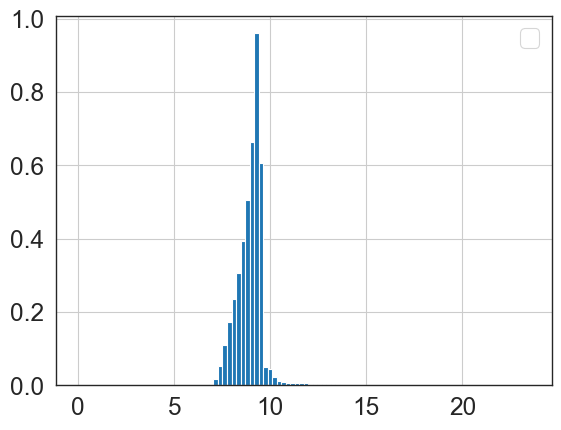

In [19]:
### >>> f = fitter.Fitter(data)

### >>> # just a trick to use only 10 distributions instead of 80 to speed up the fitting
### >>> f.distributions = f.distributions[0:10] + ['gamma']


## Next 10 distributions
f = Fitter(logtimepending)
f.distributions = f.distributions[20:30]
f.fit()
#Generate the fitted distribution summary using .summary( ) method
f.summary()

In [ ]:
### >>> f = fitter.Fitter(data)

### >>> # just a trick to use only 10 distributions instead of 80 to speed up the fitting
### >>> f.distributions = f.distributions[0:10] + ['gamma']


## Next 10 distributions
f = Fitter(logtimepending)
f.distributions = f.distributions[30:40]
f.fit()
#Generate the fitted distribution summary using .summary( ) method
f.summary()

SKIPPED genhyperbolic distribution (taking more than 30 seconds)
SKIPPED gennorm distribution (taking more than 30 seconds)
SKIPPED genlogistic distribution (taking more than 30 seconds)
SKIPPED genhalflogistic distribution (taking more than 30 seconds)
SKIPPED geninvgauss distribution (taking more than 30 seconds)
SKIPPED genpareto distribution (taking more than 30 seconds)
SKIPPED gengamma distribution (taking more than 30 seconds)
SKIPPED genextreme distribution (taking more than 30 seconds)
SKIPPED gibrat distribution (taking more than 30 seconds)
SKIPPED gompertz distribution (taking more than 30 seconds)


SKIPPED halfcauchy distribution (taking more than 30 seconds)
SKIPPED halfgennorm distribution (taking more than 30 seconds)
SKIPPED halflogistic distribution (taking more than 30 seconds)
SKIPPED halfnorm distribution (taking more than 30 seconds)
SKIPPED hypsecant distribution (taking more than 30 seconds)
SKIPPED invgamma distribution (taking more than 30 seconds)
SKIPPED invgauss distribution (taking more than 30 seconds)
SKIPPED invweibull distribution (taking more than 30 seconds)
halfcauchy was not fitted. no parameters available
halfgennorm was not fitted. no parameters available
halflogistic was not fitted. no parameters available


,sumsquare_error,aic,bic,kl_div,ks_statistic,ks_pvalue
gumbel_r,0.650080,3.379163e+05,3.379446e+05,0.349108,0.209042,0.0
gumbel_l,1.398942,2.426484e+04,2.429311e+04,inf,0.291910,0.0
halfcauchy,inf,inf,inf,inf,NaN,NaN
halfgennorm,inf,inf,inf,inf,NaN,NaN
halflogistic,inf,inf,inf,inf,NaN,NaN


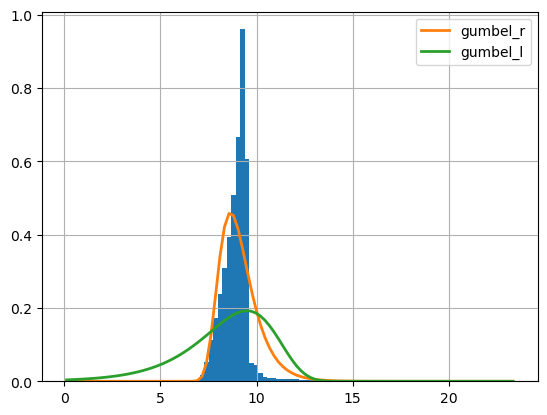

In [8]:
### >>> f = fitter.Fitter(data)

### >>> # just a trick to use only 10 distributions instead of 80 to speed up the fitting
### >>> f.distributions = f.distributions[0:10] + ['gamma']


## Next 10 distributions
f = Fitter(logtimepending)
f.distributions = f.distributions[40:50]
f.fit()
#Generate the fitted distribution summary using .summary( ) method
f.summary()

SKIPPED johnsonsb distribution (taking more than 30 seconds)
SKIPPED kappa3 distribution (taking more than 30 seconds)
SKIPPED kappa4 distribution (taking more than 30 seconds)
SKIPPED johnsonsu distribution (taking more than 30 seconds)
SKIPPED kstwo distribution (taking more than 30 seconds)
SKIPPED ksone distribution (taking more than 30 seconds)
SKIPPED kstwobign distribution (taking more than 30 seconds)
SKIPPED laplace_asymmetric distribution (taking more than 30 seconds)
SKIPPED levy distribution (taking more than 30 seconds)
johnsonsb was not fitted. no parameters available
kappa3 was not fitted. no parameters available
kappa4 was not fitted. no parameters available
johnsonsu was not fitted. no parameters available


,sumsquare_error,aic,bic,kl_div,ks_statistic,ks_pvalue
laplace,0.329083,2377.485597,2405.756711,inf,0.122363,0.0
johnsonsb,inf,inf,inf,inf,NaN,NaN
kappa3,inf,inf,inf,inf,NaN,NaN
kappa4,inf,inf,inf,inf,NaN,NaN
johnsonsu,inf,inf,inf,inf,NaN,NaN


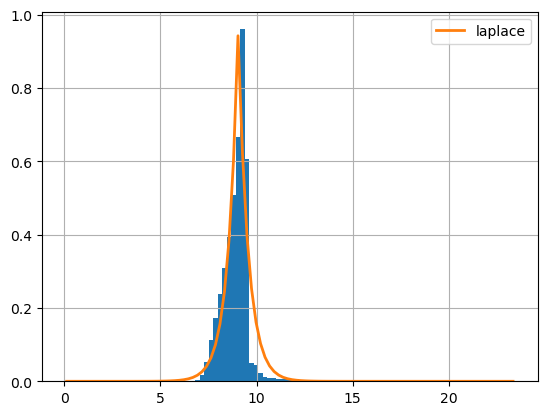

In [9]:
### >>> f = fitter.Fitter(data)

### >>> # just a trick to use only 10 distributions instead of 80 to speed up the fitting
### >>> f.distributions = f.distributions[0:10] + ['gamma']


## Next 10 distributions
f = Fitter(logtimepending)
f.distributions = f.distributions[50:60]
f.fit()
#Generate the fitted distribution summary using .summary( ) method
f.summary()

SKIPPED loggamma distribution (taking more than 30 seconds)
SKIPPED levy_l distribution (taking more than 30 seconds)
SKIPPED logistic distribution (taking more than 30 seconds)
SKIPPED levy_stable distribution (taking more than 30 seconds)
SKIPPED lomax distribution (taking more than 30 seconds)
SKIPPED loguniform distribution (taking more than 30 seconds)
SKIPPED loglaplace distribution (taking more than 30 seconds)
SKIPPED lognorm distribution (taking more than 30 seconds)
SKIPPED maxwell distribution (taking more than 30 seconds)
SKIPPED mielke distribution (taking more than 30 seconds)
loggamma was not fitted. no parameters available
levy_l was not fitted. no parameters available
logistic was not fitted. no parameters available
levy_stable was not fitted. no parameters available
lomax was not fitted. no parameters available
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


,sumsquare_error,aic,bic,kl_div,ks_statistic,ks_pvalue
loggamma,inf,inf,inf,inf,NaN,NaN
levy_l,inf,inf,inf,inf,NaN,NaN
logistic,inf,inf,inf,inf,NaN,NaN
levy_stable,inf,inf,inf,inf,NaN,NaN
lomax,inf,inf,inf,inf,NaN,NaN


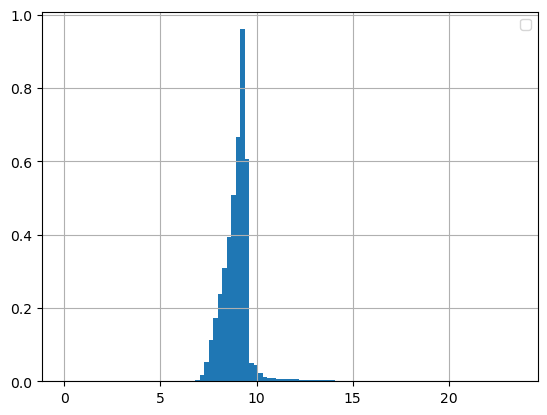

In [10]:
### >>> f = fitter.Fitter(data)

### >>> # just a trick to use only 10 distributions instead of 80 to speed up the fitting
### >>> f.distributions = f.distributions[0:10] + ['gamma']


## Next 10 distributions
f = Fitter(logtimepending)
f.distributions = f.distributions[60:70]
f.fit()
#Generate the fitted distribution summary using .summary( ) method
f.summary()

SKIPPED moyal distribution (taking more than 30 seconds)
SKIPPED ncf distribution (taking more than 30 seconds)
SKIPPED nakagami distribution (taking more than 30 seconds)
SKIPPED nct distribution (taking more than 30 seconds)
SKIPPED ncx2 distribution (taking more than 30 seconds)
SKIPPED norminvgauss distribution (taking more than 30 seconds)
SKIPPED pareto distribution (taking more than 30 seconds)
SKIPPED pearson3 distribution (taking more than 30 seconds)
SKIPPED powerlaw distribution (taking more than 30 seconds)
moyal was not fitted. no parameters available
ncf was not fitted. no parameters available
nakagami was not fitted. no parameters available
nct was not fitted. no parameters available


,sumsquare_error,aic,bic,kl_div,ks_statistic,ks_pvalue
norm,0.500773,7602.281701,7630.552815,inf,0.181816,0.0
moyal,inf,inf,inf,inf,NaN,NaN
ncf,inf,inf,inf,inf,NaN,NaN
nakagami,inf,inf,inf,inf,NaN,NaN
nct,inf,inf,inf,inf,NaN,NaN


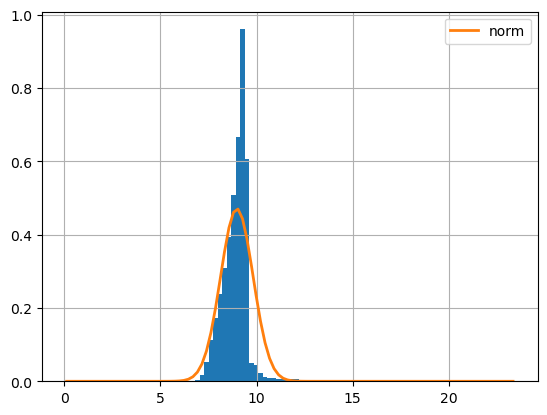

In [11]:
### >>> f = fitter.Fitter(data)

### >>> # just a trick to use only 10 distributions instead of 80 to speed up the fitting
### >>> f.distributions = f.distributions[0:10] + ['gamma']

## Next 10 distributions
f = Fitter(logtimepending)
f.distributions = f.distributions[70:80]
f.fit()
#Generate the fitted distribution summary using .summary( ) method
f.summary()

SKIPPED powernorm distribution (taking more than 30 seconds)
SKIPPED rdist distribution (taking more than 30 seconds)
SKIPPED powerlognorm distribution (taking more than 30 seconds)
SKIPPED recipinvgauss distribution (taking more than 30 seconds)
SKIPPED rv_continuous distribution (taking more than 30 seconds)
SKIPPED rv_histogram distribution (taking more than 30 seconds)
SKIPPED reciprocal distribution (taking more than 30 seconds)
SKIPPED rel_breitwigner distribution (taking more than 30 seconds)
SKIPPED rice distribution (taking more than 30 seconds)
powernorm was not fitted. no parameters available
rdist was not fitted. no parameters available
powerlognorm was not fitted. no parameters available
recipinvgauss was not fitted. no parameters available


,sumsquare_error,aic,bic,kl_div,ks_statistic,ks_pvalue
rayleigh,1.946808,764.834223,793.105338,inf,0.482958,0.0
powernorm,inf,inf,inf,inf,NaN,NaN
rdist,inf,inf,inf,inf,NaN,NaN
powerlognorm,inf,inf,inf,inf,NaN,NaN
recipinvgauss,inf,inf,inf,inf,NaN,NaN


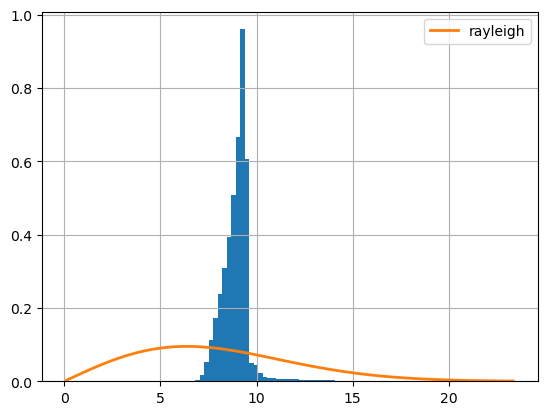

In [8]:
### >>> f = fitter.Fitter(data)

### >>> # just a trick to use only 10 distributions instead of 80 to speed up the fitting
### >>> f.distributions = f.distributions[0:10] + ['gamma']


## Next 10 distributions
f = Fitter(logtimepending)
f.distributions = f.distributions[80:90]
f.fit()
#Generate the fitted distribution summary using .summary( ) method
f.summary()

C:\Users\Marlie\anaconda3\Lib\site-packages\scipy\integrate\_quadpack_py.py:1233: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  quad_r = quad(f, low, high, args=args, full_output=self.full_output,
SKIPPED semicircular distribution (taking more than 30 seconds)
SKIPPED skewcauchy distribution (taking more than 30 seconds)
SKIPPED skewnorm distribution (taking more than 30 seconds)
SKIPPED studentized_range distribution (taking more than 30 seconds)
C:\Users\Marlie\anaconda3\Lib\site-packages\scipy\integrate\_quadpack_py.py:1233: IntegrationWarning: The integral is probably divergen

,sumsquare_error,aic,bic,kl_div,ks_statistic,ks_pvalue
semicircular,inf,inf,inf,inf,NaN,NaN
skewcauchy,inf,inf,inf,inf,NaN,NaN
skewnorm,inf,inf,inf,inf,NaN,NaN
studentized_range,inf,inf,inf,inf,NaN,NaN
t,inf,inf,inf,inf,NaN,NaN


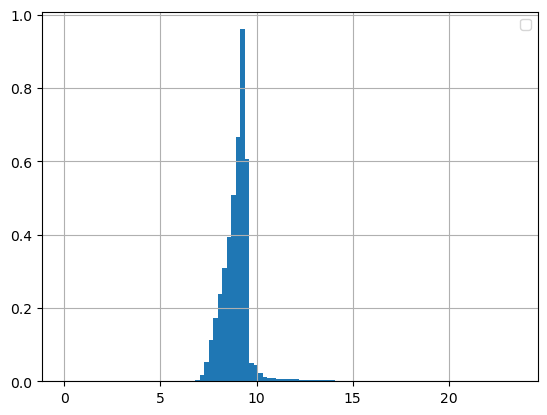

In [9]:
### >>> f = fitter.Fitter(data)

### >>> # just a trick to use only 10 distributions instead of 80 to speed up the fitting
### >>> f.distributions = f.distributions[0:10] + ['gamma']


## Next 10 distributions
f = Fitter(logtimepending)
f.distributions = f.distributions[90:100]
f.fit()
#Generate the fitted distribution summary using .summary( ) method
f.summary()

SKIPPED truncweibull_min distribution (taking more than 30 seconds)
SKIPPED tukeylambda distribution (taking more than 30 seconds)
SKIPPED truncpareto distribution (taking more than 30 seconds)
SKIPPED vonmises_fisher distribution (taking more than 30 seconds)
SKIPPED weibull_max distribution (taking more than 30 seconds)
SKIPPED wald distribution (taking more than 30 seconds)
SKIPPED vonmises_line distribution (taking more than 30 seconds)
SKIPPED weibull_min distribution (taking more than 30 seconds)
SKIPPED wrapcauchy distribution (taking more than 30 seconds)
truncweibull_min was not fitted. no parameters available
tukeylambda was not fitted. no parameters available
truncpareto was not fitted. no parameters available


,sumsquare_error,aic,bic,kl_div,ks_statistic,ks_pvalue
uniform,2.163697,635.117623,663.388738,inf,0.539694,0.0
vonmises,6.258851,682.005457,724.412129,inf,2.996860,0.0
truncweibull_min,inf,inf,inf,inf,NaN,NaN
tukeylambda,inf,inf,inf,inf,NaN,NaN
truncpareto,inf,inf,inf,inf,NaN,NaN


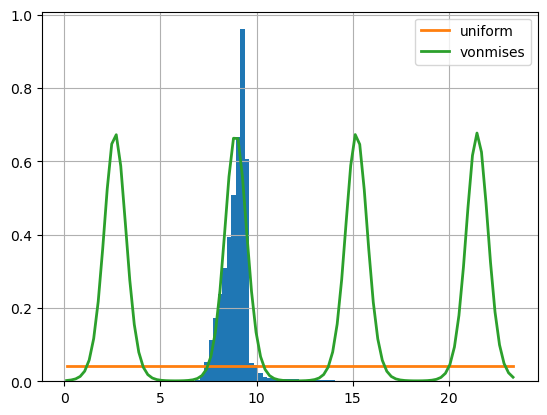

In [10]:
### >>> f = fitter.Fitter(data)

### >>> # just a trick to use only 10 distributions instead of 80 to speed up the fitting
### >>> f.distributions = f.distributions[0:10] + ['gamma']


## Next 10 distributions
f = Fitter(logtimepending)
f.distributions = f.distributions[100:111]
f.fit()
#Generate the fitted distribution summary using .summary( ) method
f.summary()

## There were 8 distributions that were successfully fitted. 
## Below: looking at 4 of these

,sumsquare_error,aic,bic,kl_div,ks_statistic,ks_pvalue
laplace,0.329083,2377.485597,2405.756711,inf,0.122363,0.0
norm,0.500773,7602.281701,7630.552815,inf,0.181816,0.0
gumbel_r,0.650080,337916.337923,337944.609037,0.349108,0.209042,0.0
vonmises,6.258851,682.005457,724.412129,inf,2.996860,0.0


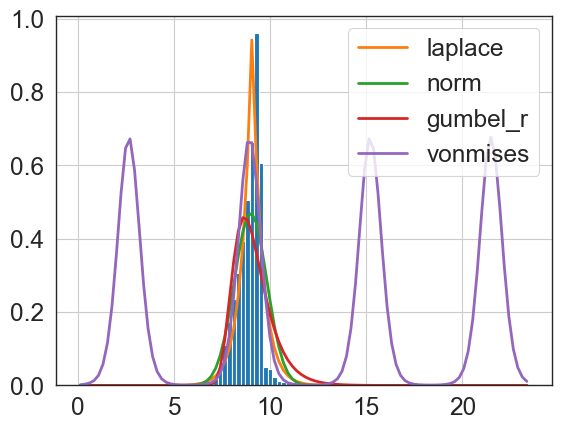

In [21]:
f = Fitter(logtimepending, timeout = 120)
f.distributions =   ['gumbel_r'] + ['laplace'] + ['norm'] + ['vonmises'] 
#f.distributions = ['expon'] + ['gumbel_l'] + ['rayleigh'] + ['uniform']
f.fit()
#Generate the fitted distribution summary using .summary( ) method
f.summary()

In [22]:
f.get_best()

{'laplace': {'loc': 9.04310445260027, 'scale': 0.522213255235929}}

,sumsquare_error,aic,bic,kl_div,ks_statistic,ks_pvalue
gumbel_l,1.398942,24264.843750,24293.114864,inf,0.291910,0.0
rayleigh,1.946808,764.834223,793.105338,inf,0.482958,0.0
uniform,2.163697,635.117623,663.388738,inf,0.539694,0.0
expon,2.230627,704.355920,732.627035,inf,0.551268,0.0


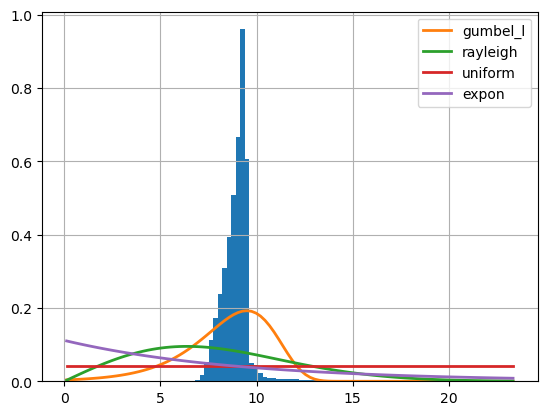

In [16]:
f = Fitter(logtimepending, timeout = 120)
#f.distributions =   ['gumbel_r'] + ['laplace'] + ['norm'] + ['vonmises'] 
f.distributions = ['expon'] + ['gumbel_l'] + ['rayleigh'] + ['uniform']
f.fit()
#Generate the fitted distribution summary using .summary( ) method
f.summary()

In [20]:
f.get_best()

{'gumbel_l': {'loc': 9.491465253316088, 'scale': 1.911576808755735}}

## New code ends here

## ~ END distribution analysis here ~ (more plots and summary stats below)

## Timepending Plot and summary statistics

In [ ]:
#del df10
# x is the 99th percentile for timepending
df10  = df3[df3['timepending']<x]

### Timepending in seconds

In [ ]:
#Plot of timepending that does not include the top 1%
plt.figure(figsize=(16,4))
sns.histplot(df10['timepending_'], bins=100, kde=True, edgecolor = 'black')
plt.title('Distribution of Time Pending\nTwo Weeks of Data Aug 25 to Sep 7 2023 \nUp to 99th percentile shown')
plt.xlabel('Time pending in seconds')
plt.show()

In [ ]:
#NOTE: df3 has all finalized rows from the trimmed two week data set 
#          omitting missing values and timepending=0 (appropriate for summary statistics), 
#     d10 excludes the top 1% of timepending values (for the histogram only)
df3['timepending_'].describe()

### Timepending in milliseconds

In [ ]:
#Plot of timepending that does not include the top 1%
plt.figure(figsize=(16,4))
sns.histplot(df10['timepending'], bins=100, kde=True, edgecolor = 'black')
plt.title('Distribution of Time Pending\nTwo Weeks of Data Aug 25 to Sep 7 2023 \nUp to 99th percentile shown')
plt.xlabel('Time pending in milliseconds')
plt.show()

In [ ]:
#NOTE: df3 has all finalized rows from the trimmed two week data set 
#          omitting missing values and timepending=0 (appropriate for summary statistics), 
#     d10 excludes the top 1% of timepending values (for the histogram only)
df3['timepending'].describe()